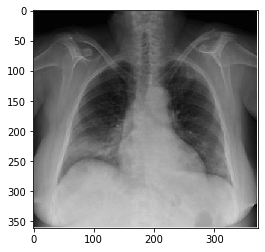

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/Sun of sadi/X-RAY COVID-19/COVID-19 Datasets"

CATEGORIES = ["COVID-19 Xray_Positive", "Normal_Xray"]

for category in CATEGORIES:  # do COVID-19 chest_Xray_Positive and Normal_Xray
    path = os.path.join(DATADIR,category)  # create path to corpus file
    for img in os.listdir(path):  # iterate over each image per corpus labels
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break

In [6]:
print(img_array.shape)

(361, 373)


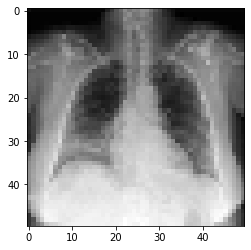

In [7]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do COVID-19 chest_Xray_Positive and Normal_Xray

        path = os.path.join(DATADIR,category)  # create path to COVID-19 chest_Xray_Positive and Normal_Xray
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=COVID-19 chest_Xray_Positive 1=Normal_Xray

        for img in tqdm(os.listdir(path)):  # iterate over each image per COVID-19 chest_Xray_Positive and Normal_Xray
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 1575/1575 [01:14<00:00, 21.09it/s]


2134


In [11]:
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
1
1
1
0
1


In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[140]
   [131]
   [124]
   ...
   [ 48]
   [ 13]
   [  0]]

  [[118]
   [ 65]
   [ 61]
   ...
   [ 54]
   [  7]
   [  0]]

  [[136]
   [ 80]
   [ 76]
   ...
   [ 49]
   [  4]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [138]
   [ 63]
   [ 10]]

  [[  0]
   [  0]
   [  0]
   ...
   [128]
   [ 67]
   [ 13]]

  [[  0]
   [  0]
   [  0]
   ...
   [134]
   [ 73]
   [ 13]]]]


In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)